<a href="https://colab.research.google.com/github/yogeeshsm/Machine-learning-projects-/blob/main/Weather_Data_Prediction_App_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
global_temp = pd.read_csv("weather_data.csv")

In [ ]:
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum)

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

In [ ]:
def clean_data(df):
  df = df.copy()
  df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty", "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
  df["dt"] = pd.to_datetime(df["dt"])
  df["month"] = df["dt"].dt.month
  df["year"] = df["dt"].dt.year
  df = df.drop(columns=["dt"], axis=1)
  df = df.dropna()
  df = df.drop(columns = ["month"], axis=1)
  df = df.set_index(["year"])
  return df

global_temp = clean_data(global_temp)
print(global_temp.head())

      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
year                                                                   
1850                   0.749               8.242              -3.206   
1850                   3.071               9.970              -2.291   
1850                   4.954              10.347              -1.905   
1850                   7.217              12.934               1.018   
1850                  10.004              15.655               3.811   

      LandAndOceanAverageTemperature  
year                                  
1850                          12.833  
1850                          13.588  
1850                          14.043  
1850                          14.667  
1850                          15.507  


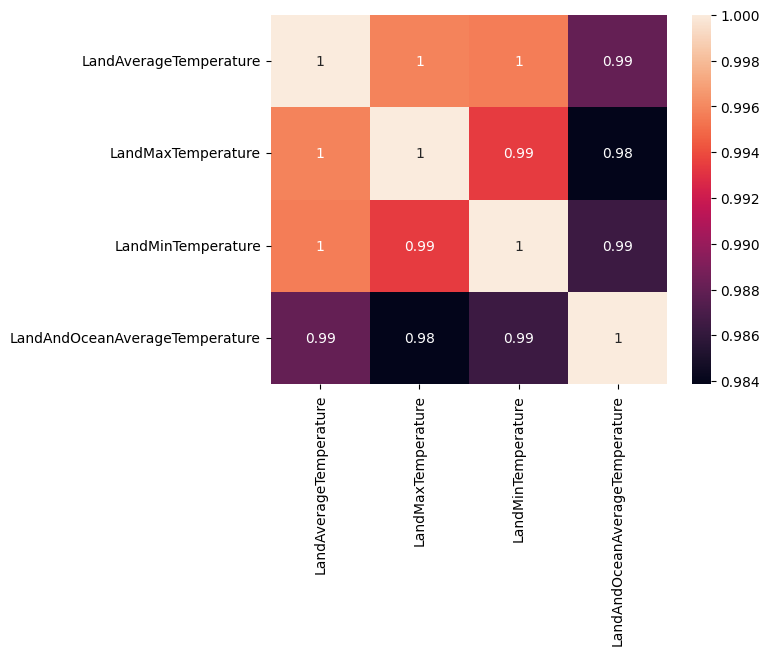

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
target = "LandAndOceanAverageTemperature"
y = global_temp[target]
x = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


In [ ]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)
print("Baseline MAE:", mean_squared_error(ytrain, ypred))

Baseline MAE: 1.6338702518167276


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
forest.fit(xtrain, ytrain)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [ ]:
import numpy as np

ypred = forest.predict(xval)
errors = mean_squared_error(yval, ypred)
print("Test MAE:", errors)

Test MAE: 0.031236958659839276


In [ ]:
import numpy as np

ypred = forest.predict(xtrain)
errors = mean_squared_error(ypred, ytrain)
print("Train MAE:", errors)

Train MAE: 0.004416508789424352
